In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path='/content/drive/MyDrive/NK_Hack/train_data.parquet'

In [ ]:
df=pd.read_parquet(file_path,engine='auto')

In [ ]:
df.head()

,timestamp,underlying,expiry,call_iv_23500,call_iv_23600,call_iv_23700,call_iv_23800,call_iv_23900,call_iv_24000,call_iv_24100,...,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41
0,1745296089000000000,24160.9,2025-04-24,0.237872,0.213056,0.191247,0.173081,0.157550,0.146430,0.140084,...,0.013995,0.007922,-1.947502e+05,0.024715,0.530894,-0.002354,-3.224848e+05,-1.600795e+06,13063.446970,445511.363636
1,1745304077000000000,24188.1,2025-04-24,0.236015,0.213177,0.189552,0.169672,0.153648,0.141522,0.134405,...,-0.004976,-0.009555,-1.481909e+06,-0.004020,-1.429919,-0.000843,1.658073e+06,-1.742468e+06,31364.628427,-46123.161765
2,1745313495000000000,24148.6,2025-04-24,0.225757,0.199469,0.178547,0.156187,0.140276,0.130288,0.124253,...,-0.012869,-0.004012,-1.250688e+06,-0.035342,-0.523109,0.013778,-2.646675e+06,-5.051008e+07,-847564.971737,-225333.881579
3,1745313499000000000,24147.4,2025-04-24,0.220805,0.195398,0.176247,0.155271,0.139753,0.129641,0.123994,...,-0.006014,0.004207,6.378700e+05,-0.045472,0.741664,0.002590,-1.607321e+06,4.170899e+05,333918.361928,-114960.453869
4,1745313608000000000,24155.9,2025-04-24,0.220088,0.195815,0.177803,0.156409,0.141458,0.130448,0.124707,...,0.020878,-0.001747,9.592702e+04,0.044814,-0.015472,0.012185,6.820360e+05,4.081106e+06,3309.895833,183946.289063


In [ ]:
df.describe()

,timestamp,underlying,call_iv_23500,call_iv_23600,call_iv_23700,call_iv_23800,call_iv_23900,call_iv_24000,call_iv_24100,call_iv_24200,...,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41
count,1.783400e+05,178340.000000,178340.000000,1.783400e+05,178340.000000,1.783400e+05,1.783400e+05,178340.000000,178340.000000,178340.000000,...,178340.000000,178340.000000,1.783400e+05,178340.000000,178340.000000,178340.000000,1.783400e+05,1.783400e+05,1.783400e+05,1.783400e+05
mean,1.746052e+18,24323.883938,0.423909,-3.220020e+07,0.349236,3.499773e+05,1.429192e+03,1.580317,0.195213,0.160997,...,0.000277,0.000014,-1.421471e+04,0.000588,-0.093444,0.000832,-1.877999e+04,-1.383081e+05,-4.700416e+03,-3.956062e+02
std,3.824884e+14,129.485600,2.178706,6.800128e+09,1.984786,7.389699e+07,5.550653e+05,402.799771,0.056097,0.032196,...,0.016701,0.008653,2.262233e+06,0.039787,2.346862,0.085648,4.314987e+06,1.873729e+07,7.563046e+05,1.225248e+06
min,1.745296e+18,23865.200000,0.186658,-1.435870e+12,0.036630,-1.244180e+05,-9.622650e+04,-0.045733,0.123994,0.074081,...,-0.275930,-0.144559,-1.019237e+08,-0.625017,-16.815711,-2.586113,-2.726196e+08,-4.113054e+08,-8.211573e+07,-3.067265e+08
25%,1.745818e+18,24280.600000,0.256790,2.417285e-01,0.226604,2.107440e-01,1.925507e-01,0.173014,0.161050,0.143029,...,-0.007785,-0.004317,-6.453953e+05,-0.018780,-1.098059,-0.022254,-7.875973e+05,-5.170499e+06,-1.279849e+05,-0.000000e+00
50%,1.745995e+18,24347.000000,0.297625,2.770240e-01,0.256366,2.354450e-01,2.165680e-01,0.196701,0.174057,0.157880,...,0.000258,0.000012,0.000000e+00,0.000566,-0.006216,0.000048,4.336592e+03,-2.000000e-06,0.000000e+00,0.000000e+00
75%,1.746432e+18,24385.200000,0.404716,3.753433e-01,0.346050,3.155980e-01,2.813773e-01,0.246242,0.210348,0.168074,...,0.008461,0.004381,6.062090e+05,0.020147,0.965078,0.023691,8.029313e+05,5.008932e+06,1.150824e+05,0.000000e+00
max,1.746610e+18,24668.500000,912.411000,7.904570e+08,833.879000,1.560360e+10,2.334040e+08,120282.000000,0.633309,0.445672,...,0.402689,0.191822,4.357080e+07,0.841955,22.124694,2.564958,2.498199e+08,6.597803e+08,2.846932e+07,1.981789e+08


In [ ]:
df.shape

(178340, 97)

In [ ]:
file_path_test='/content/drive/MyDrive/NK_Hack/test_data.parquet'
test_df=pd.read_parquet(file_path_test,engine='auto')
train_cols = df.columns
test_cols = test_df.columns
# Columns in train but not in test, in original train order
train_spec_cols = [col for col in train_cols if col not in test_cols]

# Columns in test but not in train, in original test order
test_spec_cols = [col for col in test_cols if col not in train_cols]

print("Ordered columns in train_data.parquet that are absent in test parquet:", train_spec_cols)
print("Ordered columns in test_data.parquet that are absent in train parquet:", test_spec_cols)


Ordered columns in train_data.parquet that are absent in test parquet: ['expiry', 'call_iv_23500', 'call_iv_23600', 'call_iv_23700', 'call_iv_23800', 'call_iv_23900', 'put_iv_22500', 'put_iv_22600', 'put_iv_22700', 'put_iv_22800', 'put_iv_22900']
Ordered columns in test_data.parquet that are absent in train parquet: ['call_iv_26100', 'call_iv_26200', 'call_iv_26300', 'call_iv_26400', 'call_iv_26500', 'put_iv_25100', 'put_iv_25200', 'put_iv_25300', 'put_iv_25400', 'put_iv_25500']


In [ ]:
df.drop(train_spec_cols,axis=1,inplace=True)

In [ ]:
df.shape

(178340, 86)

In [ ]:
iv_cols = [col for col in df.columns if "_iv_" in col]
# cols involving iv data

In [ ]:
test_iv_cols = [col for col in test_df.columns if "_iv_" in col]
# cols involving iv data

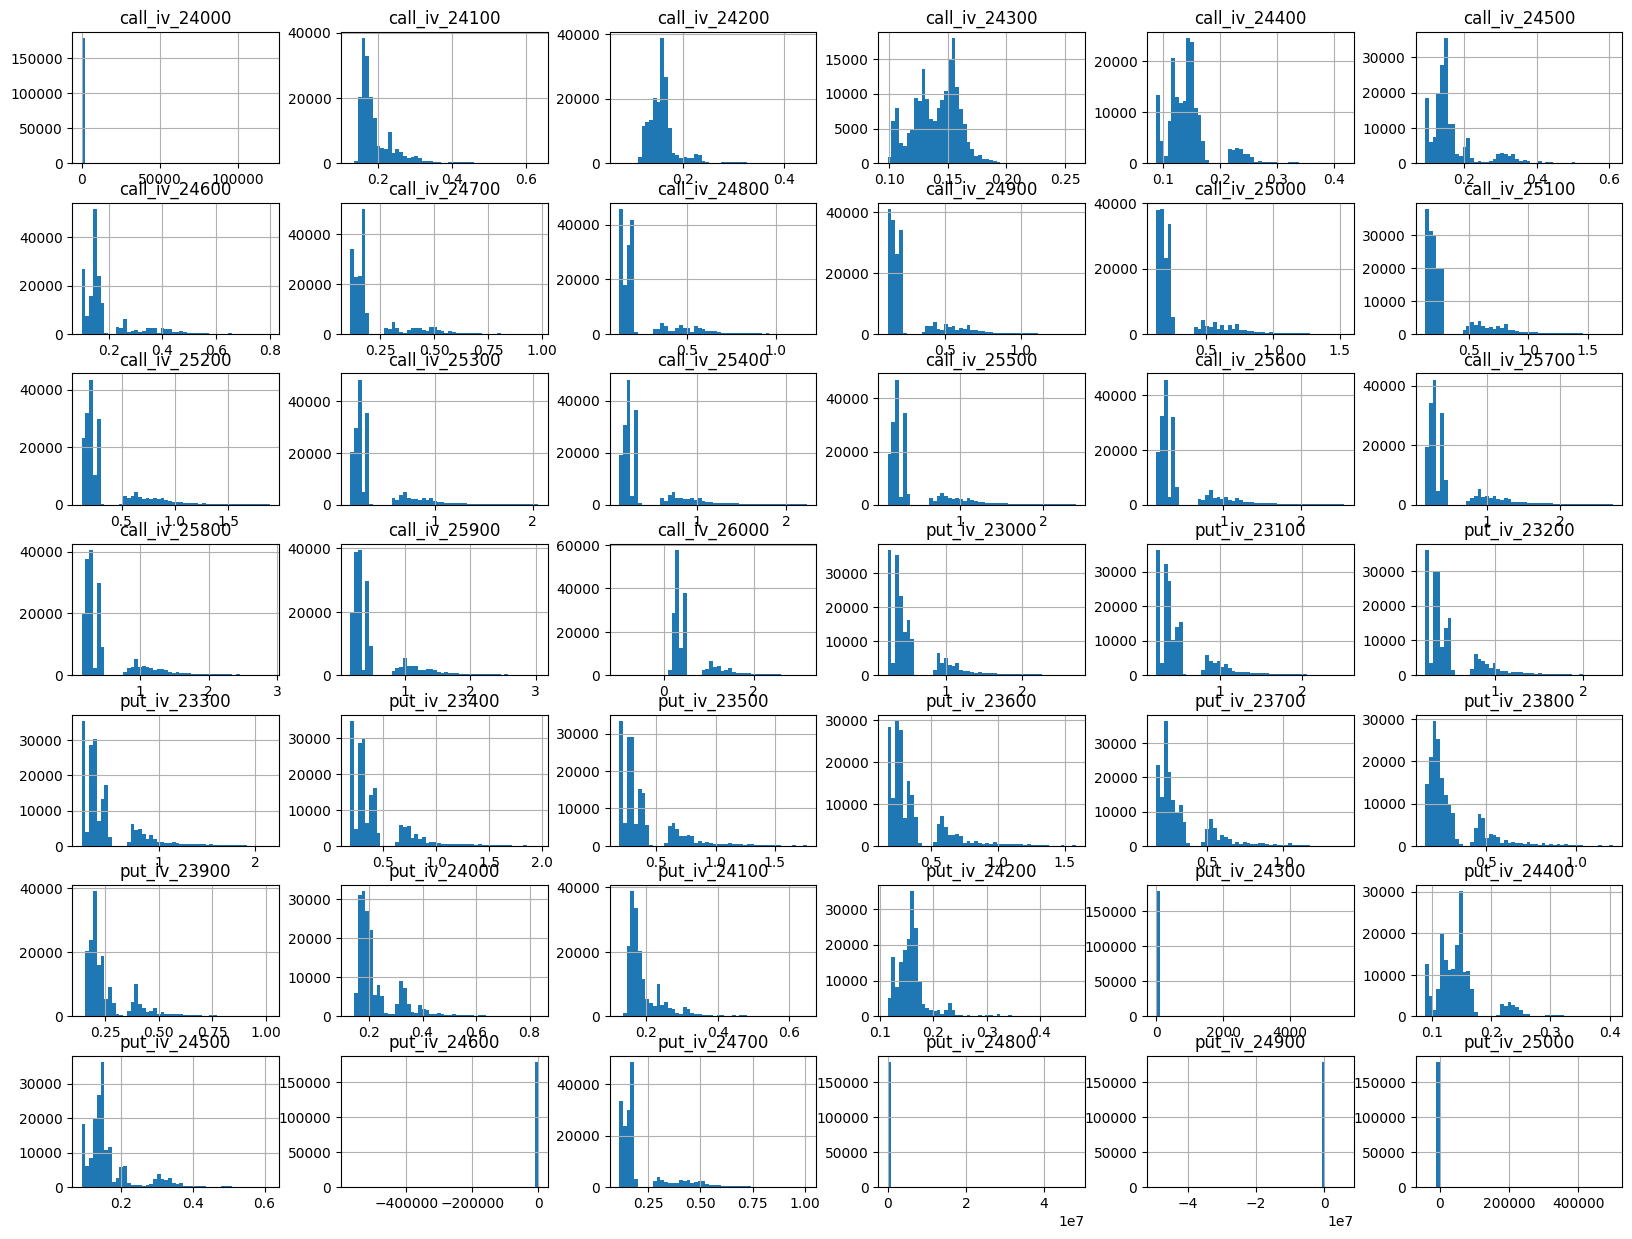

In [ ]:
#plot iv_cols from df_1 as histogram

df[iv_cols].hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
# prompt: cells with _iv_ columns should lie between 0 and 2

# Identify columns that contain '_iv_'
iv_cols = [col for col in df.columns if "_iv_" in col]

# Filter the DataFrame to keep only rows where all _iv_ columns are between 0 and 2
df_filtered = df[(df[iv_cols] >= 0.5).all(axis=1) & (df[iv_cols] <= 0.75).all(axis=1)]

# You can now work with df_filtered which contains the data that satisfies the condition
# print the shape of the filtered dataframe to see how many rows remain
print(f"Original shape: {df.shape}")
print(f"Filtered shape: {df_filtered.shape}")

# Optionally, you can replace the original dataframe with the filtered one
# df = df_filtered

Original shape: (178340, 86)
Filtered shape: (0, 86)


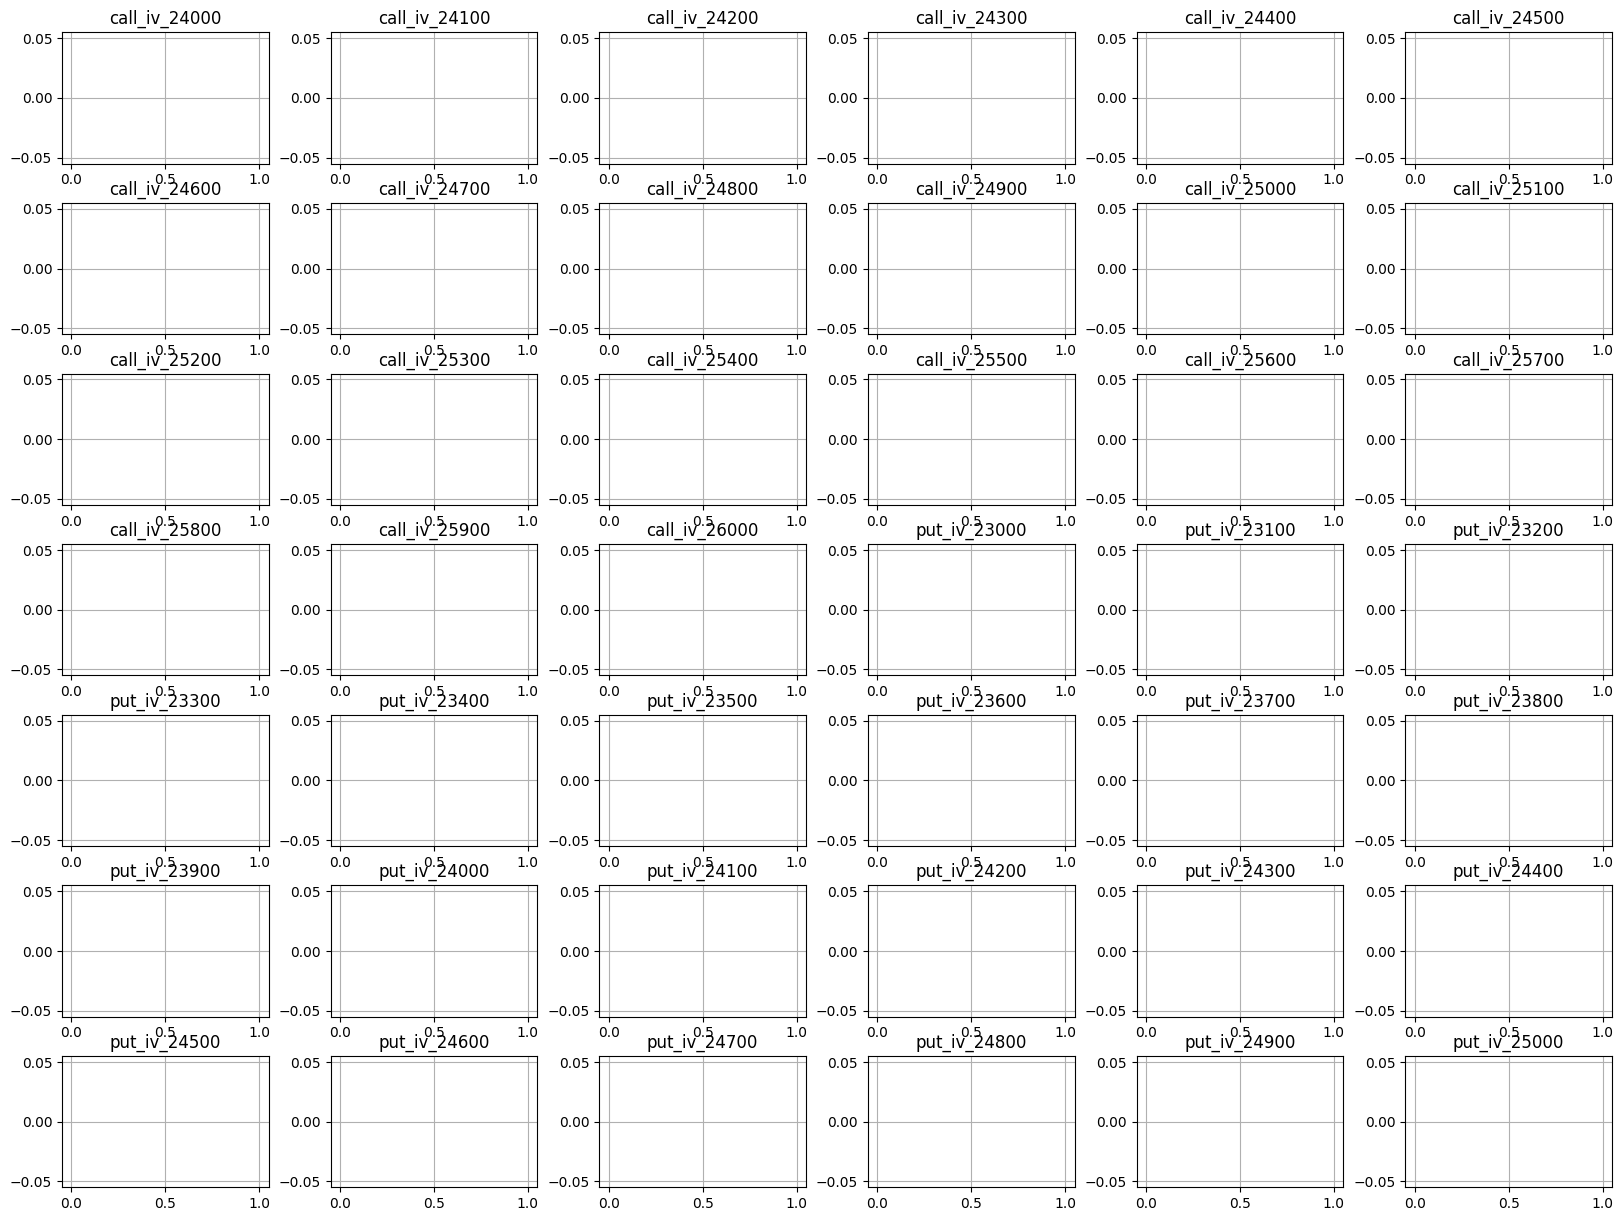

In [ ]:
df_filtered[iv_cols].hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
scaler = StandardScaler()

In [ ]:
def preprocess(ds_frame):
  drop_worthy=['timestamp']
  filtered_df=ds_frame.drop(drop_worthy,axis=1)
  cols_to_scale = [col for col in filtered_df.columns if '_iv_' not in col]

# Apply StandardScaler to the identified columns
  filtered_df[cols_to_scale] = scaler.fit_transform(filtered_df[cols_to_scale])
  return filtered_df

In [ ]:
df_ready=preprocess(df_filtered)
df_ready.head()

ValueError: Found array with 0 sample(s) (shape=(0, 43)) while a minimum of 1 is required by StandardScaler.

NameError: name 'train_spec_cols' is not defined

In [ ]:
df_fire=preprocess(test_df)
df_fire.head()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score, mean_absolute_error

In [ ]:
lr=LinearRegression()

In [ ]:
df_fire[test_spec_cols]

In [ ]:
from sklearn.impute import SimpleImputer
simp_imp=SimpleImputer(missing_values=np.nan, strategy='mean')

In [ ]:
df_fire_copy=df_fire.copy()
df_fire_copy.drop('underlying',axis=1,inplace=True)
from sklearn.impute import KNNImputer
import pandas as pd



# Transpose to treat rows as features (so KNN will work across columns)
df_fire_copy_T = df_fire_copy.T

# KNN Imputer (now imputes across original columns)
knn_imputer = KNNImputer(n_neighbors=3)
df_fire_copy_imputed_T = pd.DataFrame(
    knn_imputer.fit_transform(df_fire_copy_T),
    index=df_fire_copy_T.index,
    columns=df_fire_copy_T.columns
)
# Transpose back to original shape — this was the bug
df_fire_copy = df_fire_copy_imputed_T.T

# Add back 'underlying' column (assumed to be untouched)
df_fire_copy = pd.concat([df_fire['underlying'], df_fire_copy], axis=1)

# Fallback mean imputation for any remaining NaNs
simp_imp = SimpleImputer(missing_values=np.nan, strategy='mean')
df_fire_imputed_copy = simp_imp.fit_transform(df_fire_copy)

# Convert back to DataFrame
df_fire_imputed_copy = pd.DataFrame(df_fire_imputed_copy, columns=df_fire_copy.columns)

# Preview
df_fire_imputed_copy.head()

In [ ]:
df_test_spec_imputed_cols=df_fire_imputed_copy[test_spec_cols]
df_test_spec_imputed_cols.head()

In [ ]:
df_attack=df_fire.drop(test_spec_cols,axis=1)
df_attack.head()

In [ ]:
df_fire_imputed_copy_trainer=df_fire_imputed_copy.drop(test_spec_cols,axis=1)
df_fire_imputed_copy_trainer.head()

In [ ]:
df_trial=df_attack.copy()

In [ ]:
from sklearn.neural_network import MLPRegressor


# Best MLPRegressor model (tuned baseline)
model = MLPRegressor(
    hidden_layer_sizes=(128, 64, 32),
    activation='relu',
    solver='adam',
    alpha=1e-4,
    learning_rate='adaptive',
    learning_rate_init=0.001,
    max_iter=500,
    early_stopping=True,
    random_state=42
)


In [ ]:
for iv in iv_cols:
  X=df_ready.drop(iv, axis=1)
  y=df_ready[iv]
  model.fit(X, y)
  df_fire_imputed_copy_trainer_predictor=df_fire_imputed_copy_trainer.drop(iv,axis=1)
  for i in range(len(df_attack)):
    if np.isnan(df_attack.loc[i, iv]):
      df_trial.loc[i, iv] = model.predict(df_fire_imputed_copy_trainer_predictor.loc[i].values.reshape(1, -1))
df_trial.to_csv('trial.csv',index=False)

In [ ]:
jdf=pd.read_csv('trial.csv')
jdf.head()

In [ ]:
jdf.columns

In [ ]:
test_cols

In [ ]:
jdf_call_iv_cols=[col for col in jdf.columns if "call_iv_" in col]
jdf_call_iv_cols

In [ ]:
jdf_put_iv_cols=[col for col in jdf.columns if "put_iv_" in col]
jdf_put_iv_cols

In [ ]:
test_spec_call_iv_cols=[col for col in test_spec_cols if "call_iv_" in col]
test_spec_call_iv_cols

In [ ]:
test_spec_put_iv_cols=[col for col in test_spec_cols if "put_iv_" in col]
test_spec_put_iv_cols

In [ ]:
submission_2_1=pd.concat([test_df['timestamp'],jdf[jdf_call_iv_cols],df_test_spec_imputed_cols[test_spec_call_iv_cols],jdf[jdf_put_iv_cols],df_test_spec_imputed_cols[test_spec_put_iv_cols]],axis=1)
submission_2_1.head()

In [ ]:
df_fire_2=df_fire.copy()
df_fire_2[df_trial.columns]=df_trial[df_trial.columns]
df_fire_2.head()

In [ ]:
submission_2_1.to_csv('submission_2_2.csv',index=False)

In [ ]:
submission_2_1.describe().loc['max']

In [ ]:
submission_2_1[iv_cols].describe().loc['max'].max()

In [ ]:
test_df[iv_cols].describe().loc['max'].max()

In [ ]:
for iv in test_spec_cols:
  X=df_fire_imputed_copy.drop(iv, axis=1)
  y=df_fire_imputed_copy[iv]
  model.fit(X, y)
  df_fire_imputed_copy_trainer_predictor_2=df_fire_imputed_copy.drop(iv,axis=1)
  for i in range(len(df_attack)):
    if np.isnan(df_fire_2.loc[i, iv]):
      df_fire_2.loc[i, iv] = model.predict(df_fire_imputed_copy_trainer_predictor_2.loc[i].values.reshape(1, -1))
df_fire_2.to_csv('trial_2.csv',index=False)

In [ ]:
df_fire_2.head()

In [ ]:
submission_2_3=pd.concat([test_df['timestamp'],df_fire_2[test_iv_cols]],axis=1)
submission_2_3.head()

In [ ]:
submission_2_3[test_iv_cols].describe().loc['max'].max()

In [ ]:
submission_2_3.shape

In [ ]:
submission_2_3.to_csv('submission_3_1.csv',index=False)

In [ ]:
# prompt: #scatter PLOT first sample of OF SUBMISSION 2_3,for the columns having_iv on their name

import matplotlib.pyplot as plt
# Get the first sample (row) of submission_2_3
first_sample = submission_2_3.iloc[754]

# Identify columns in the first sample that have "_iv_" in their name
iv_cols_sample = [col for col in first_sample.index if "_iv_" in col]

# Extract the values for the identified columns
iv_values_sample = first_sample[iv_cols_sample]

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(iv_cols_sample, iv_values_sample, marker='o')
plt.xticks(rotation=90)
plt.ylabel('IV Value')
plt.title('Scatter Plot of IV Values for the First Sample in Submission_2_3')
plt.tight_layout()
plt.show()

In [ ]:
itftj

In [ ]:
mean_absolute_error_test=[]
mean_absolute_error_train=[]
y_pred_test_list=[]
y_pred_train_list=[]
Y_test_list=[]
Y_train_list=[]

In [ ]:
for iv in iv_cols:
  X=filtered_df.drop(iv, axis=1)
  y=filtered_df[iv]
  X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size=0.2, random_state=42)
  lr.fit(X_train, y_train)
  y_pred = lr.predict(X_train)
  mean_absolute_error_train.append(mean_absolute_error(y_train, y_pred))
  y_pred_test = lr.predict(X_validate)
  mean_absolute_error_test.append(mean_absolute_error(y_validate, y_pred_test))
  y_pred_test_list.append(y_pred_test)
  y_pred_train_list.append(y_pred)
  Y_test_list.append(y_validate)
  Y_train_list.append(y_train)

In [ ]:
#plot
plt.figure(figsize=(10, 6))
plt.plot(iv_cols[6:], mean_absolute_error_train[6:], marker='o', label='Train')
plt.plot(iv_cols[6:], mean_absolute_error_test[6:], marker='o', label='Test')

In [ ]:
y_test_df=pd.DataFrame(Y_test_list)
y_train_df=pd.DataFrame(Y_train_list)
y_pred_test_df=pd.DataFrame(y_pred_test_list)
y_pred_train_df=pd.DataFrame(y_pred_train_list)

In [ ]:
y_test_df.head()

In [ ]:
#plot y_pred_test vs y_test
plt.figure(figsize=(10, 6))
plt.scatter(y_validate, y_pred_test, label='Test Data')

In [ ]:
y_pred

In [ ]:
df_test_para=pd.read_parquet('test_data.parquet',engine='auto')

In [ ]:
timestamp_series=df_test_para['timestamp']

In [ ]:
df_test_para.drop("timestamp",axis=1,inplace=True)

In [ ]:
iv_cols_test=[col_test for col_test in df_test_para.columns if "_iv_" in col_test]
iv_cols_test

In [ ]:
# prompt: show the column names same in test_para and filtered_df

test_para_set = df_test_para.columns
filtered_df_cols = filtered_df.columns
print("Columns present in both dataframes:")
common_col_list=[]
for common_col in test_para_set.intersection(filtered_df_cols):
  common_col_list.append(common_col)

In [ ]:
df_test_p1=df_test_para[common_col_list]
df_test_p1.shape

In [ ]:
df_test_p1

In [ ]:
df_test_para_copy=df_test_para.copy()

In [ ]:
from sklearn.impute import SimpleImputer
simp_imp=SimpleImputer(missing_values=np.nan, strategy='median')
#use imputer
imputed_df_test_para_copy=simp_imp.fit_transform(df_test_para_copy)
imputed_df_test_para_copy=pd.DataFrame(imputed_df_test_para_copy,columns=df_test_para_copy.columns)
imputed_df_test_para_copy.head()

In [ ]:
df_target=imputed_df_test_para_copy[iv_cols_test]
df_target.head()

In [ ]:
#concatenate series_timestamp and  df_target
df_target=pd.concat([timestamp_series,df_target],axis=1)
df_target.head()

In [ ]:
df_target.to_csv('submission_1_1.csv',index=False)